### Составление корпуса

# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json
with open("data/recipes.json", encoding='utf8') as f:
    recipes = json.load(f)
print(recipes[0])

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


### Составление корпуса

In [2]:
from gensim import corpora, models
import numpy as np

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [3]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [4]:
print(texts[0])
print(corpus[0])
print(len(texts), len(corpus))

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]
39774 39774


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [5]:
%%time
np.random.seed(76543)
# здесь код для построения модели:
lda = models.LdaModel(corpus,num_topics=40,passes=5)

CPU times: user 1min 40s, sys: 1.98 s, total: 1min 42s
Wall time: 2min 2s


In [6]:
tops = lda.show_topics(num_topics=40, num_words=10, formatted=False)
tops

[(0,
  [('104', 0.08435624),
   ('279', 0.069652334),
   ('117', 0.06820787),
   ('15', 0.06475346),
   ('29', 0.04343038),
   ('118', 0.04200344),
   ('211', 0.039378475),
   ('146', 0.039224982),
   ('32', 0.026413864),
   ('555', 0.024324281)]),
 (1,
  [('902', 0.07626369),
   ('1124', 0.06486786),
   ('722', 0.054310236),
   ('803', 0.05273927),
   ('245', 0.049071107),
   ('333', 0.043941006),
   ('129', 0.03877148),
   ('805', 0.037152734),
   ('1099', 0.036055468),
   ('116', 0.03498802)]),
 (2,
  [('59', 0.08077186),
   ('210', 0.054326236),
   ('306', 0.051505446),
   ('15', 0.04196253),
   ('189', 0.041078888),
   ('104', 0.03884947),
   ('600', 0.03419394),
   ('475', 0.032589514),
   ('20', 0.031097056),
   ('94', 0.02874546)]),
 (3,
  [('207', 0.07417786),
   ('15', 0.072981715),
   ('660', 0.06094041),
   ('3', 0.046520766),
   ('11', 0.04639456),
   ('664', 0.04190159),
   ('44', 0.03728033),
   ('59', 0.036501285),
   ('241', 0.036416627),
   ('743', 0.030416423)]),
 (4

In [7]:
from collections import Counter
rez = []
for t in tops:
    for i in t[1]:
        rez += [dictionary[int(i[0])]]
cntr = Counter(rez)
print(cntr)

Counter({'salt': 23, 'garlic': 12, 'olive oil': 11, 'onions': 11, 'water': 10, 'sugar': 9, 'garlic cloves': 7, 'butter': 7, 'ground black pepper': 6, 'vegetable oil': 4, 'all-purpose flour': 3, 'baking powder': 3, 'soy sauce': 3, 'extra-virgin olive oil': 3, 'ground cumin': 3, 'pepper': 3, 'black pepper': 2, 'grated parmesan cheese': 2, 'large eggs': 2, 'milk': 2, 'shallots': 2, 'carrots': 2, 'dried thyme': 2, 'purple onion': 2, 'jalapeno chilies': 2, 'fresh lime juice': 2, 'unsalted butter': 2, 'eggs': 2, 'oil': 2, 'ground turmeric': 2, 'paprika': 2, 'chili powder': 2, 'bay leaves': 2, 'kosher salt': 2, 'chopped onion': 1, 'cooking spray': 1, 'fat free less sodium chicken broth': 1, 'ground red pepper': 1, 'sliced green onions': 1, 'pinenuts': 1, 'corn kernels': 1, 'diced onions': 1, 'tortillas': 1, 'salt and ground black pepper': 1, 'cream cheese': 1, '1% low-fat milk': 1, 'vegetable stock': 1, 'sliced black olives': 1, 'cream cheese, soften': 1, 'chopped fresh chives': 1, 'fresh par

In [8]:
c_salt = cntr['salt']
c_sugar = cntr['sugar']
c_water = cntr['water']
c_mushrooms = cntr['mushrooms']
c_chicken = cntr['chicken']
c_eggs = cntr['eggs']
print(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs) # на другой версии библиотек было 24 9 9 1 0 2

23 9 10 0 1 2


In [9]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("answers/3.4. LDA_answer1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))
        
save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs) 

In [10]:
topics = lda.show_topics(num_topics=40, num_words=10, formatted=False)
counter = {"salt":0, "sugar":0, "water":0, "mushrooms":0, "chicken":0, "eggs":0}
for topic in topics:
    for pair in topic[1]:
        if dictionary[int(pair[0])] in counter:
            counter[dictionary[int(pair[0])]]+=1
counter


{'salt': 23, 'sugar': 9, 'water': 10, 'mushrooms': 0, 'chicken': 1, 'eggs': 2}

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [11]:
import copy
dictionary2 = copy.deepcopy(dictionary)

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [12]:
more_40k = []
dict_size_before = len(dictionary2)

for i in dictionary2.dfs:
    if dictionary2.dfs[i] > 4000:
        more_40k += [i]
more_40k

[3, 5, 15, 11, 18, 20, 29, 44, 52, 59, 104, 114]

In [13]:
dictionary2.filter_tokens(more_40k)
dict_size_after = len(dictionary2)
print (dict_size_before, dict_size_after)

6714 6702


In [14]:
corpus2 = [dictionary2.doc2bow(text) for text in texts]  # составляем корпус документов

In [15]:
corpus_size_before = sum([len(k) for k in corpus])
corpus_size_after = sum([len(k) for k in corpus2])
corpus_size_before,corpus_size_after

(428249, 343665)

In [16]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("answers/3.4. LDA_answer2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))
        
save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after)

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [17]:
%%time
np.random.seed(76543)
# здесь код для построения модели:
lda2 = models.LdaModel(corpus2,num_topics=40,passes=5,id2word=dictionary2)

CPU times: user 1min 19s, sys: 1.61 s, total: 1min 21s
Wall time: 1min 48s


In [18]:
coh1 = lda.top_topics(corpus=corpus, dictionary=dictionary)
coh2 = lda2.top_topics(corpus=corpus2, dictionary=dictionary2)

In [19]:
coh1[:3]

[([(0.07471719, '272'),
   (0.046659898, '35'),
   (0.045573615, '577'),
   (0.044990048, '203'),
   (0.040298376, '519'),
   (0.03975849, '246'),
   (0.037641417, '70'),
   (0.030633228, '40'),
   (0.028630374, '839'),
   (0.027202277, '15'),
   (0.02638145, '44'),
   (0.024505613, '230'),
   (0.02251514, '473'),
   (0.021690229, '108'),
   (0.018151732, '57'),
   (0.017937295, '17'),
   (0.016857373, '59'),
   (0.015207724, '909'),
   (0.01509594, '268'),
   (0.01500634, '3')],
  -2.1952822737672593),
 ([(0.08805029, '27'),
   (0.054254398, '98'),
   (0.045557838, '97'),
   (0.044381693, '230'),
   (0.03924487, '90'),
   (0.03899394, '362'),
   (0.03631193, '52'),
   (0.033750813, '3'),
   (0.030877922, '18'),
   (0.026797485, '93'),
   (0.025468884, '29'),
   (0.025250027, '351'),
   (0.022499308, '167'),
   (0.020695688, '194'),
   (0.020657364, '15'),
   (0.016247895, '104'),
   (0.013703787, '311'),
   (0.013594843, '489'),
   (0.012099203, '632'),
   (0.011179684, '80')],
  -2.3

In [20]:
for i in coh1:
    print(i[1],i)

-2.1952822737672593 ([(0.07471719, '272'), (0.046659898, '35'), (0.045573615, '577'), (0.044990048, '203'), (0.040298376, '519'), (0.03975849, '246'), (0.037641417, '70'), (0.030633228, '40'), (0.028630374, '839'), (0.027202277, '15'), (0.02638145, '44'), (0.024505613, '230'), (0.02251514, '473'), (0.021690229, '108'), (0.018151732, '57'), (0.017937295, '17'), (0.016857373, '59'), (0.015207724, '909'), (0.01509594, '268'), (0.01500634, '3')], -2.1952822737672593)
-2.3714453881032598 ([(0.08805029, '27'), (0.054254398, '98'), (0.045557838, '97'), (0.044381693, '230'), (0.03924487, '90'), (0.03899394, '362'), (0.03631193, '52'), (0.033750813, '3'), (0.030877922, '18'), (0.026797485, '93'), (0.025468884, '29'), (0.025250027, '351'), (0.022499308, '167'), (0.020695688, '194'), (0.020657364, '15'), (0.016247895, '104'), (0.013703787, '311'), (0.013594843, '489'), (0.012099203, '632'), (0.011179684, '80')], -2.3714453881032598)
-2.443017502398328 ([(0.058837604, '44'), (0.052406993, '196'), 

In [21]:
chrnc = [i[1] for i in coh1]
coherence = sum(chrnc)/len(chrnc)
chrnc2 = [i[1] for i in coh2]
coherence2 = sum(chrnc2)/len(chrnc2)
print(coherence,coherence2)

-5.839332585536563 -8.304104910059584


In [22]:
# Из-за обновленной версиии gensim ответ выше не будет принят Coursera
# в старой версии gensim значения coherence и coherence2 получены -691.775595, -752.970975
def save_answers3(coherence, coherence2):
    with open("answers/3.4. LDA_answer3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))
        
save_answers3(-691.775595, -752.970975)

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [23]:
thems2 = lda2.get_document_topics(corpus2)
thems2[0]

[(25, 0.128125), (30, 0.13388853), (31, 0.6223615)]

Также выведите содержимое переменной *.alpha* второй модели:

In [24]:
alpha2 = lda2.alpha
alpha2

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025], dtype=float32)

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [25]:
%%time
np.random.seed(76543)
# здесь код для построения модели:
lda3 = models.LdaModel(corpus2,num_topics=40,passes=5,id2word=dictionary2, alpha=1)

CPU times: user 51.2 s, sys: 809 ms, total: 52 s
Wall time: 57.5 s


In [26]:
thems3 = lda3.get_document_topics(corpus2, minimum_probability=0.01)
thems2 = lda2.get_document_topics(corpus2, minimum_probability=0.01)
count_model2 = sum([len(topic) for topic in thems2])
count_model3 = sum([len(topic) for topic in thems3])
print (count_model2, count_model3) # 203661 1590960

198232 1590960


In [27]:
def save_answers4(count_model2, count_model3):
    with open("answers/3.4. LDA_answer4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))
        
save_answers4(count_model2, count_model3)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [29]:
thms = lda2.get_document_topics(corpus2,minimum_probability = 0)
classes = set()
for rec in recipes:
    classes.add(rec["cuisine"])
classes = list(classes)
Y = []
for rec in recipes:
    Y.append(classes.index(rec["cuisine"]))
X = [[topic[1] for topic in rec] for rec in thms]
RFC = RandomForestClassifier(n_estimators=100)
scr = cross_val_score(estimator=RFC, X=X, y=Y, cv=3)
accuracy = scr.mean()
accuracy

0.5523455228889231

In [30]:
def save_answers5(accuracy):
     with open("answers/3.4. LDA_answer5.txt", "w") as fout:
        fout.write(str(accuracy))
save_answers5(accuracy)

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [31]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        topic_distr = topic_distr/sum(topic_distr) # кусок со StackOveflow без него ошибка ValueError: probabilities do not sum to 1
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print (w)

In [32]:
generate_recipe(lda2,5)

cilantro leaves
chicken
jumbo pasta shells
lemon juice
ground turmeric


### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [33]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [35]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

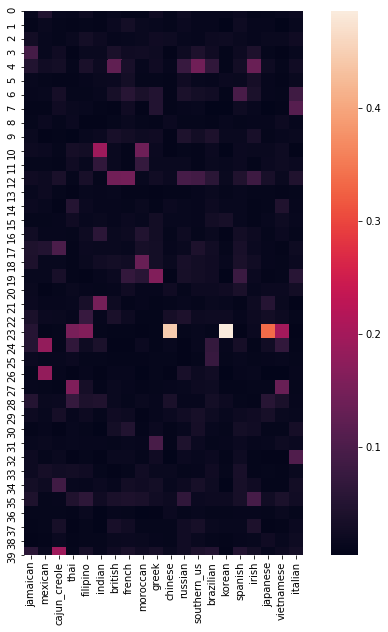

In [36]:
# Визуализируйте матрицу
plot_matrix(compute_topic_cuisine_matrix(lda2, corpus2, recipes))

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 